# CKF Model

The following tries to reproduce Fig 9 from [Hawkes, Jalali, Colquhoun (1992)](http://dx.doi.org/10.1098/rstb.1992.0116). First we create the $Q$-matrix for this particular model.

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from dcprogs.likelihood import QMatrix

tau = 0.2
qmatrix = QMatrix([[-1, 1, 0], [19, -29, 10], [0, 0.026, -0.026]], 1)

We then create a function to plot each exponential component in the asymptotic expression. An explanation on how to get to these plots can be found in the **CH82** notebook.

In [4]:
from dcprogs.likelihood._methods import exponential_pdfs

def plot_exponentials(qmatrix, tau, x0=None, x=None, ax=None, nmax=2, shut=False):
    from dcprogs.likelihood import missed_events_pdf
    from dcprogs.likelihood._methods import exponential_pdfs

    if x is None: x = np.arange(0, 5*tau, tau/10)
    if x0 is None: x0 = x
    pdf = missed_events_pdf(qmatrix, tau, nmax=nmax, shut=shut)
    graphb = [x0, pdf(x0+tau), '-k']
    functions = exponential_pdfs(qmatrix, tau, shut=shut)
    plots = ['.r', '.b', '.g'] 
    together = None
    for f, p in zip(functions[::-1], plots):
        if together is None: together = f(x+tau)
        else: together = together + f(x+tau)
        graphb.extend([x, together, p])

    if ax is None: plot(*graphb)
    else: ax.plot(*graphb)

For practical reasons, we plot the excess shut-time probability densities in the graph below. In all other particulars, it should reproduce Fig. 9 from [Hawkes, Jalali, Colquhoun (1992)](http://dx.doi.org/10.1098/rstb.1992.0116)

<IPython.core.display.Javascript object>


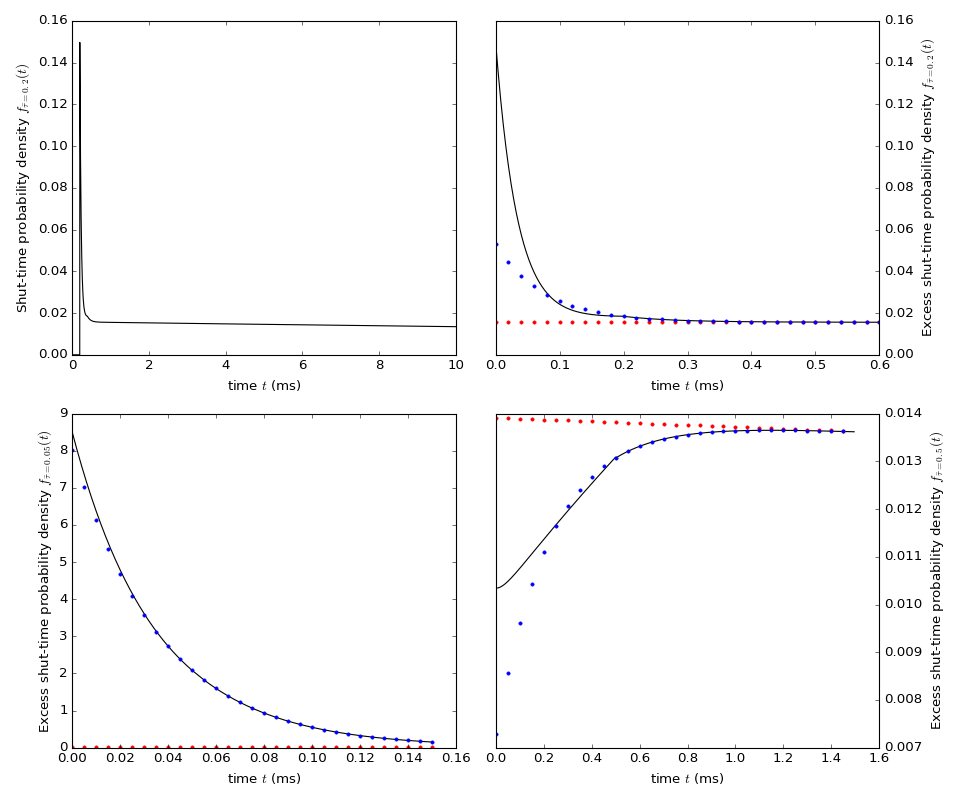

In [5]:
from dcprogs.likelihood import missed_events_pdf

fig = plt.figure(figsize=(12, 10 ))
ax = fig.add_subplot(2, 2, 1)
x = np.arange(0, 10, tau/100)
pdf = missed_events_pdf(qmatrix, 0.2, nmax=2, shut=True)
ax.plot(x, pdf(x), '-k')
ax.set_xlabel('time $t$ (ms)')
ax.set_ylabel('Shut-time probability density $f_{\\bar{\\tau}=0.2}(t)$')


ax = fig.add_subplot(2, 2, 2)
ax.set_xlabel('time $t$ (ms)')
tau = 0.2
x, x0 = np.arange(0, 3*tau, tau/10.0), np.arange(0, 3*tau, tau/100) 
plot_exponentials(qmatrix, tau, shut=True, ax=ax, x=x, x0=x0)
ax.set_ylabel('Excess shut-time probability density $f_{{\\bar{{\\tau}}={tau}}}(t)$'.format(tau=tau))
ax.set_xlabel('time $t$ (ms)')
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

ax = fig.add_subplot(2, 2, 3)
tau = 0.05
x, x0 = np.arange(0, 3*tau, tau/10.0), np.arange(0, 3*tau, tau/100) 
plot_exponentials(qmatrix, tau, shut=True, ax=ax, x=x, x0=x0)
ax.set_ylabel('Excess shut-time probability density $f_{{\\bar{{\\tau}}={tau}}}(t)$'.format(tau=tau))
ax.set_xlabel('time $t$ (ms)')

ax = fig.add_subplot(2, 2, 4)
tau = 0.5
x, x0 = np.arange(0, 3*tau, tau/10.0), np.arange(0, 3*tau, tau/100) 
plot_exponentials(qmatrix, tau, shut=True, ax=ax, x=x, x0=x0)
ax.set_ylabel('Excess shut-time probability density $f_{{\\bar{{\\tau}}={tau}}}(t)$'.format(tau=tau))
ax.set_xlabel('time $t$ (ms)')
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

fig.tight_layout()

